In [4]:
# Import  all the necessary libraries for data handling, machine learning model training and evaluation.
# Data manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, classification_report
)


In [6]:
# Load and Prepare the Data
# Load dataset
df = pd.read_csv("gene_expression.csv")

# Rename columns for consistency
df.columns = ['Gene1', 'Gene2', 'Cancer']

# Show first few rows
df.head()


,Gene1,Gene2,Cancer
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [8]:
# Data Preprocessing
# Split features and target
X = df[['Gene1', 'Gene2']]
y = df['Cancer']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
#  Model Training and Evaluation
# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "NeuralNet": MLPClassifier(max_iter=1000, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Model": model
    }

# Convert results to DataFrame
pd.DataFrame(results).T



,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix,Model
KNN,0.92,0.91791,0.904412,0.911111,0.964967,"[[306, 22], [26, 246]]",KNeighborsClassifier()
SVM,0.945,0.947566,0.930147,0.938776,0.980883,"[[314, 14], [19, 253]]",SVC(probability=True)
NeuralNet,0.936667,0.930147,0.930147,0.930147,0.98141,"[[309, 19], [19, 253]]","MLPClassifier(max_iter=1000, random_state=42)"


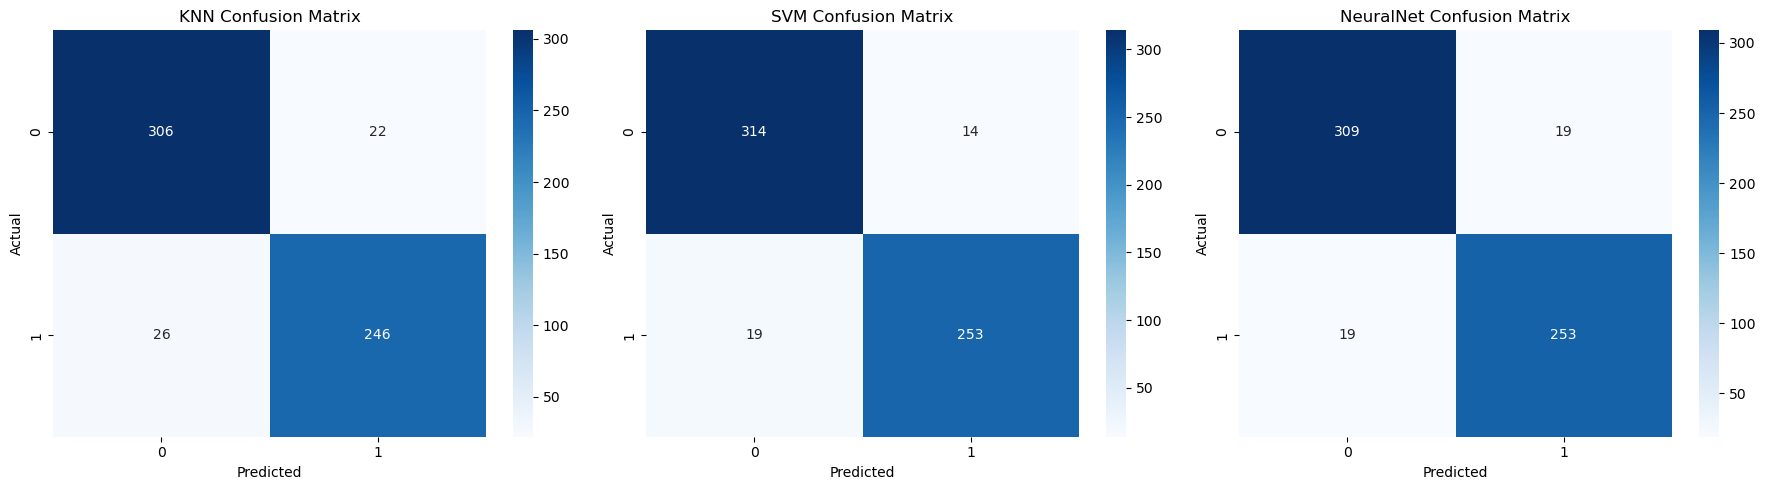

In [12]:
#  Confusion Matrix Visualization
# Visualize confusion matrix for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, res) in enumerate(results.items()):
    cm = res["Confusion Matrix"]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


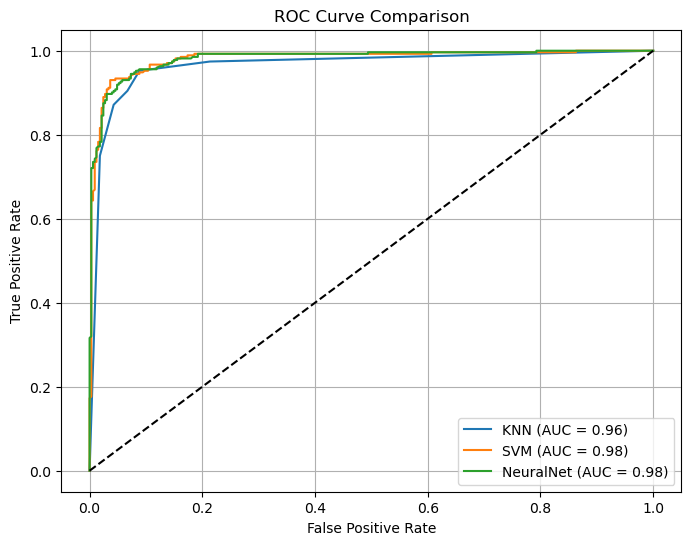

In [14]:
# ROC Curve Visualization
plt.figure(figsize=(8, 6))

for name, res in results.items():
    model = res["Model"]
    y_score = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {res["ROC AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
